# Phase 2: Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) is a critical phase in any machine learning project. It helps us understand our data, uncover patterns, spot anomalies, test assumptions, and check relationships between variables. Proper EDA ensures that our data is in the best shape for modeling.

# 2.1 Initial Data Exploration
Before diving into complex visualizations, we need to get an overview of our dataset.

In [1]:
import pandas as pd
df=pd.read_csv("C:\\dataaa\\Mumbai House Prices new.csv")
df.head()
#understand the types of data (integer, float, object) and check for missing values.
print(df.info())
#to display number of rows and columns.
print(df.shape)
#Use .describe() to get a statistical summary of numerical columns (mean, median, quartiles, etc.).
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bhk         76038 non-null  int64  
 1   type        76038 non-null  object 
 2   locality    76038 non-null  object 
 3   area        76038 non-null  int64  
 4   price       76038 non-null  float64
 5   price_unit  76038 non-null  object 
 6   region      76038 non-null  object 
 7   status      76038 non-null  object 
 8   age         76038 non-null  object 
 9   PRICE in L  76038 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 5.8+ MB
None
(76038, 10)
                bhk          area        price    PRICE in L
count  76038.000000  76038.000000  76038.00000  76038.000000
mean       2.015111   1024.536850     29.38227    168.417795
std        0.922754    670.276165     32.90345    217.665511
min        1.000000    127.000000      1.00000      4.490000
25%        1.00

# Check for Unique Values in Categorical Features:

In [2]:
import pandas as pd
df=pd.read_csv("C:\\dataaa\\Mumbai House Prices new.csv")
df.head()
print("Categorical Features:")
print(df['type'].unique())
print(df['bhk'].unique())
#print(df['region'].unique())
print(df['locality'].unique())

Categorical Features:
['Apartment' 'Villa' 'Studio Apartment' 'Independent House' 'Penthouse']
[ 3  2  5  1  4  6  9  8 10  7]
['Lak And Hanware The Residency Tower' 'Radheya Sai Enclave Building No 2'
 'Romell Serene' ... 'Ahuja Prasadam Phase III' 'HBS Marineview'
 'Hubtown Serene']


In [3]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features
df[categorical_features]

,type,locality,price_unit,region,status,age
0,Apartment,Lak And Hanware The Residency Tower,Cr,Andheri West,Ready to move,New
1,Apartment,Radheya Sai Enclave Building No 2,L,Naigaon East,Under Construction,New
2,Apartment,Romell Serene,Cr,Borivali West,Under Construction,New
3,Apartment,Soundlines Codename Urban Rainforest,L,Panvel,Under Construction,New
4,Apartment,Origin Oriana,L,Mira Road East,Under Construction,New
...,...,...,...,...,...,...
76033,Apartment,Parinee Liva Roca,Cr,Juhu,Ready to move,Unknown
76034,Apartment,Parinee Liva Roca,Cr,Juhu,Ready to move,Unknown
76035,Apartment,Lodha Seaview,Cr,Napeansea Road,Ready to move,Unknown
76036,Apartment,Hubtown Serene,Cr,Bandra East,Ready to move,Unknown


In [4]:
import pandas as pd
df=pd.read_csv("C:\\dataaa\\Mumbai House Prices new.csv")
df.head()
#Identify the features with missing values and their percentage.
missing_values = df.isnull().sum()
print(missing_values)
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)

bhk           0
type          0
locality      0
area          0
price         0
price_unit    0
region        0
status        0
age           0
PRICE in L    0
dtype: int64
bhk           0.0
type          0.0
locality      0.0
area          0.0
price         0.0
price_unit    0.0
region        0.0
status        0.0
age           0.0
PRICE in L    0.0
dtype: float64


# 2.2 Univariate Analysis
In univariate analysis, we focus on exploring each feature individually to understand their distribution, central tendency, and dispersion.

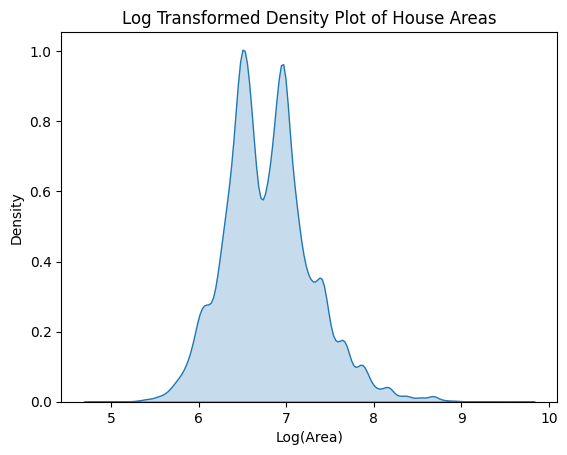

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("C:\\dataaa\\Mumbai House Prices new.csv")
df['log_area'] = np.log(df['area'])  # Adding 1 to avoid log(0)
sns.kdeplot(df['log_area'], fill=True)
plt.title('Log Transformed Density Plot of House Areas')
plt.xlabel('Log(Area)')
plt.ylabel('Density')
plt.show()

# Bivariate analysis
In this phase, the focus is on the relationships between individual features and the target variable, which is likely Price or Price in L.

1.Numerical vs Target (Price or Price in L):
Scatter Plots for Continuous Variables:

Analyze how Area, Age, and BHK impact Price in L. Scatter plots can help understand if there’s a linear relationship or any patterns.

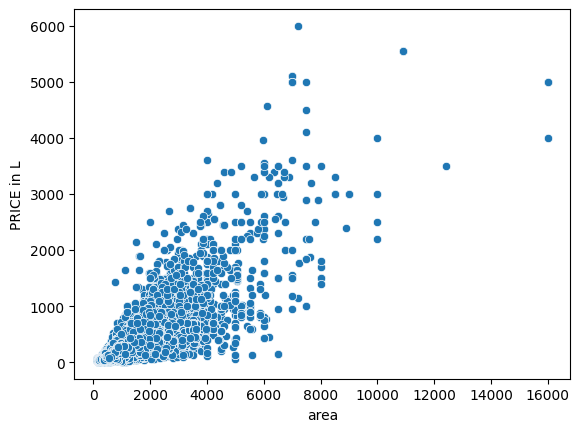

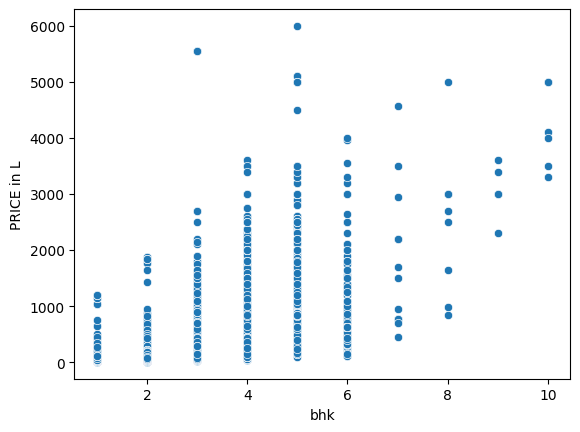

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# First scatter plot
sns.scatterplot(x='area', y='PRICE in L', data=df)
plt.show()  # Show the first plot

# Second scatter plot
sns.scatterplot(x='bhk', y='PRICE in L', data=df)
plt.show()  # Show the second plot


# Correlation Matrix:

Calculate and visualize the correlation between numerical features like Area, BHK, Age, and Price in L. A heatmap will help you understand multicollinearity (high correlation between independent variables).

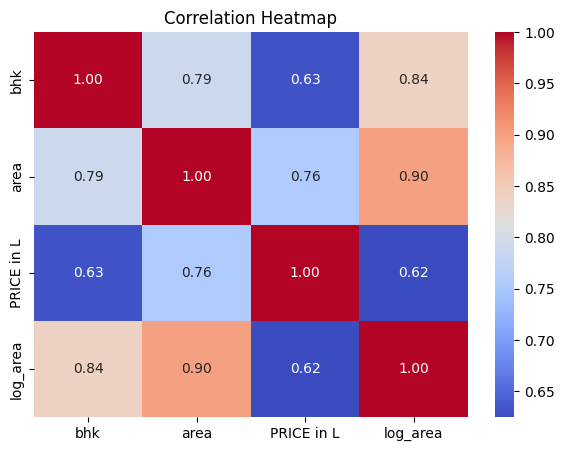

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Exclude the 'price' column
numeric_df = numeric_df.drop(columns=['price'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


# Categorical vs Target (Price in L):
Box Plots to Compare Categorical Features:

For categorical variables like BHK, Type, Region, and Status, use box plots to compare how the median Price in L varies across these categories. This can provide insights into whether certain property types or regions have higher prices.

<Axes: xlabel='bhk', ylabel='PRICE in L'>

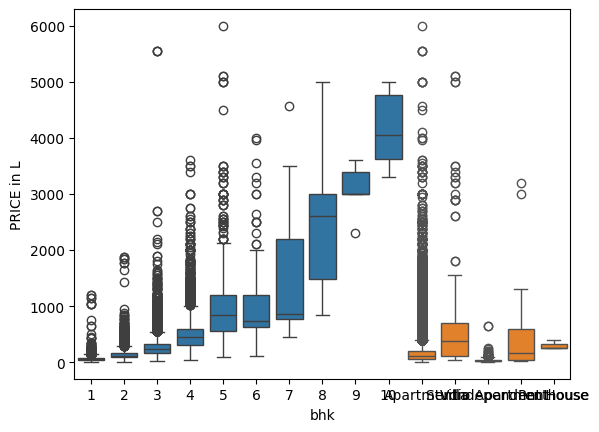

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='bhk', y='PRICE in L', data=df)
sns.boxplot(x='type', y='PRICE in L', data=df)

# Groupby and Aggregation:

Use groupby() to get summary statistics for categorical variables. This will show how the average price varies across different groups.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("C:\\dataaa\\Mumbai House Prices new.csv")
df.head()
df.groupby('type')['PRICE in L'].mean()
df.groupby('region')['PRICE in L'].mean()

region
Adaigaon                    35.000000
Agripada                   552.081967
Airoli                     126.080341
Ambarnath                   30.202308
Ambernath East              34.025274
                              ...    
kandivali                  307.500000
kasaradavali thane west     63.387778
mumbai                      29.990000
sector                     150.000000
vile parle west            105.000000
Name: PRICE in L, Length: 228, dtype: float64

# 2.5 Multivariate Analysis
Multivariate analysis helps understand interactions between multiple features simultaneously.

Key Tasks:
Pair Plots:

Use pair plots to explore interactions between numerical features like Price, Area, BHK, and Age.


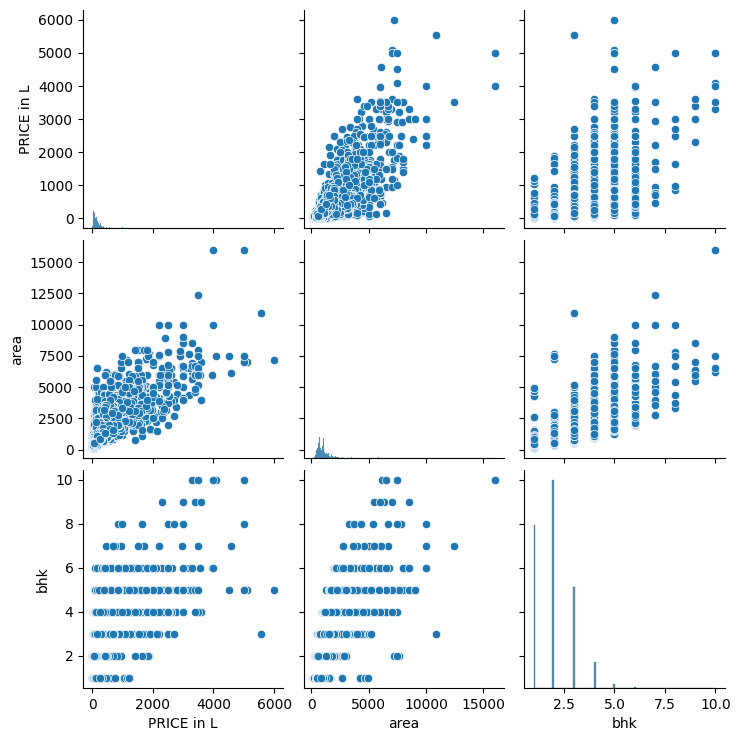

In [10]:
import seaborn as sns
sns.pairplot(df[['PRICE in L', 'area', 'bhk', 'age']])

# Interaction Between Features:

Examine if any interaction between categorical and numerical features (e.g., Type and Area, Region and Price) gives rise to new patterns. You may create interaction terms during feature engineering.

In [11]:

import pandas as pd
df=pd.read_csv("C:\\dataaa\\Mumbai House Prices new.csv")
df.head()# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  4


,bhk,area,price,PRICE in L
0,3,685,2.50,250.00
1,2,640,52.51,52.51
2,2,610,1.73,173.00
3,2,876,59.98,59.98
4,2,659,94.11,94.11


In [12]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
df[discrete_feature].head()

Discrete Variables Count: 1


,bhk
0,3
1,2
2,2
3,2
4,2
